<a href="https://colab.research.google.com/github/simongiando/DeepLearning/blob/main/Practice/Tensor_Keras_Tutor_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading Data from outside





In [36]:
## Import library
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


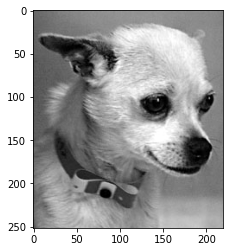

In [16]:
DATADIR = "/content/drive/MyDrive/Deep Learning/Dataset/kagglecatsanddogs_5340/PetImages"
CATEGORIES = ["Dog",'Cat']

for category in CATEGORIES:
  path = os.path.join(DATADIR,category) # path to cats or dogs dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow (img_array,cmap='gray')
    plt.show()
    break
  break

In [20]:
print (img_array)

[[102 100 105 ... 134 132 127]
 [106 105 106 ... 136 133 130]
 [103 105 103 ... 135 132 132]
 ...
 [ 84  89  93 ... 173 172 170]
 [ 81  87  88 ... 174 173 173]
 [ 79  87  87 ... 174 175 175]]


In [19]:
print (img_array.shape)

(252, 220)


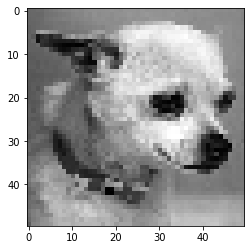

In [22]:
# Resize the image 
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [27]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [29]:
print(len(training_data))

24946


In [31]:
# Shuffle the data
random.shuffle (training_data)

In [33]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
1
0
1
0
1
0
0


In [34]:
x=[]
y=[]

In [35]:
for features,label in training_data:
  x.append(features)
  y.append(label)

x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [37]:
pickle_out = open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [39]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

In [41]:
x[1]

array([[[ 24],
        [ 59],
        [ 69],
        ...,
        [219],
        [217],
        [214]],

       [[ 56],
        [ 66],
        [ 72],
        ...,
        [224],
        [223],
        [220]],

       [[ 63],
        [ 69],
        [ 78],
        ...,
        [227],
        [226],
        [224]],

       ...,

       [[125],
        [133],
        [ 96],
        ...,
        [ 62],
        [ 57],
        [ 52]],

       [[124],
        [127],
        [ 92],
        ...,
        [ 59],
        [ 54],
        [ 49]],

       [[116],
        [123],
        [ 86],
        ...,
        [ 54],
        [ 53],
        [ 48]]], dtype=uint8)